In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("../dataset/train.csv")

In [14]:
missing_values = df.isnull().sum()
missing_ratio = missing_values / len(df)
threshold = 0.5

# Kolom yang missing <50% tapi >0
less = missing_values[(missing_ratio < threshold) & (missing_values > 0)].index

# Kolom numerik & kategorikal dari 'less'
numeric_features = df[less].select_dtypes(include="number").columns
categorical_features = df[less].select_dtypes(include="object").columns

# Isi missing numerik dengan median
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].median())

# Isi missing kategorikal dengan mode
for column in categorical_features:
    df[column] = df[column].fillna(df[column].mode()[0])

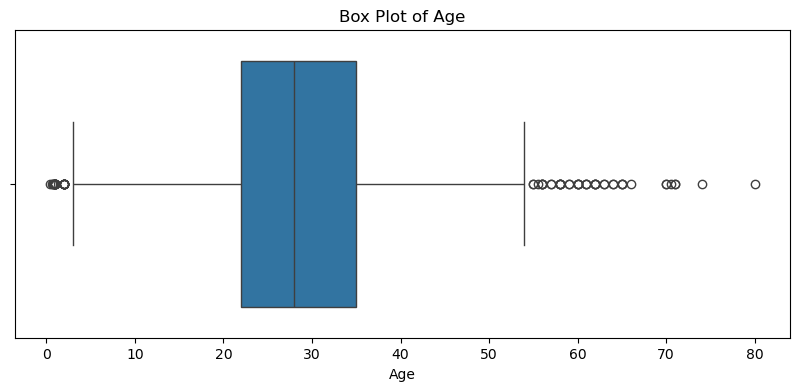

In [15]:
for feature in numeric_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [16]:
if len(numeric_features) > 0:
    Q1 = df[numeric_features].quantile(0.25)
    Q3 = df[numeric_features].quantile(0.75)
    IQR = Q3 - Q1

    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    # Kondisi baris tanpa outlier
    condition = ~((df[numeric_features] < lower_fence) | (df[numeric_features] > upper_fence)).any(axis=1)
    df = df.loc[condition]

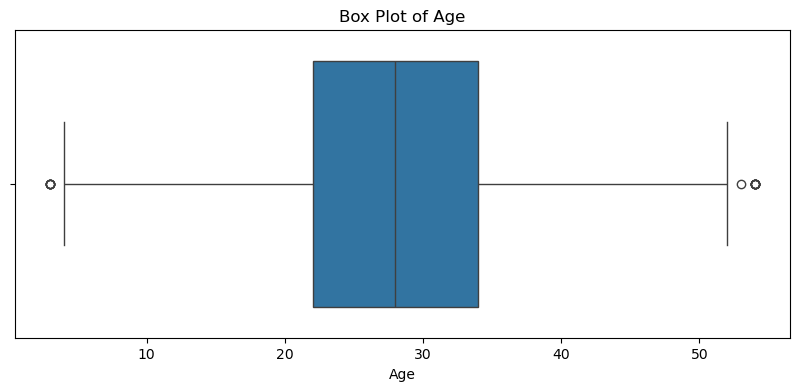

In [17]:
for feature in numeric_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()


In [18]:
for feature in df.columns:
    print(f"===== {feature} =====")
    print(df[feature].describe(include="all"))
    print("\n")

===== PassengerId =====
count    825.000000
mean     447.369697
std      257.088865
min        1.000000
25%      226.000000
50%      445.000000
75%      671.000000
max      891.000000
Name: PassengerId, dtype: float64


===== Survived =====
count    825.000000
mean       0.380606
std        0.485830
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64


===== Pclass =====
count    825.000000
mean       2.341818
std        0.824096
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64


===== Name =====
count                     825
unique                    825
top       Dooley, Mr. Patrick
freq                        1
Name: Name, dtype: object


===== Sex =====
count      825
unique       2
top       male
freq       531
Name: Sex, dtype: object


===== Age =====
count    825.000000
mean      28.515152
std       10.177256
min        3

In [ ]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,825.000000,825.000000,825.000000,825,825,825.000000,825.000000,825.000000,825,825.000000,176,825
unique,NaN,NaN,NaN,825,2,NaN,NaN,NaN,647,NaN,128,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,531,NaN,NaN,NaN,7,NaN,4,600
mean,447.369697,0.380606,2.341818,NaN,NaN,28.515152,0.507879,0.357576,NaN,31.483615,NaN,NaN
std,257.088865,0.485830,0.824096,NaN,NaN,10.177256,1.090670,0.798599,NaN,49.956429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,3.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,226.000000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,445.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,13.416700,NaN,NaN
75%,671.000000,1.000000,3.000000,NaN,NaN,34.000000,1.000000,0.000000,NaN,30.070800,NaN,NaN
